<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#manual-digitaliztion" data-toc-modified-id="manual-digitaliztion-1">manual digitaliztion</a></span></li></ul></div>

In [1]:
# spateo imports
import os,re,json
import numpy as np
import spateo as st
import scanpy as sc
import pandas as pd
import anndata as ad

import matplotlib.pyplot as plt
import glob

2024-04-10 14:18:57.052823: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


/home/[anonymous]/.local/miniconda3/envs/scRNA/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning:


nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)




In [2]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from pathlib import Path
import json

In [57]:
import shutil
ouput = '../macaca#1_cellbins/cellbin_allslice_v0410/'

In [36]:
file_path = glob.glob('../*cellbin.h5ad')

In [45]:
#file path
maca1_chip_list = []
maca2_chip_list = []
# chip names
maca1_chips = []
maca2_chips = []


for path in file_path:
    chip = os.path.basename(path).split("_cellbin")[0]
    if len(chip) > 4:
        maca2_chip_list.append(path)
        maca2_chips.append(chip)
    else:
        maca1_chip_list.append(path)
        maca1_chips.append(chip)

# manual digitaliztion

In [174]:
adata = sc.read_h5ad(maca1_chip_list[0])

In [175]:
adata = adata[adata.obs.island == 'main']
adata = adata[adata.obs.cell_area == '347']
adata.uns['__type'] = "UMI"
adata.obsm['spatial_cutbins'] = adata.obsm['spatial'][:,:2] // 50
adata.obsm['spatial_cutbins'][:,0] = adata.obsm['spatial_cutbins'][:,0] - min(adata.obsm['spatial_cutbins'][:,0]) + 10
adata.obsm['spatial_cutbins'][:,1] = adata.obsm['spatial_cutbins'][:,1] - min(adata.obsm['spatial_cutbins'][:,1]) + 10
cluster_label_image_lowres = st.dd.gen_cluster_image(adata,bin_size= 3,spatial_key="spatial_cutbins", cluster_key='orig.ident', show=False)
contours, cluster_image_close, cluster_image_contour = st.dd.extract_cluster_contours(cluster_label_image_lowres,adata.obs['cluster_img_label'].unique(), bin_size=1, k_size=6, show=False)

|-----> Set up the color for the clusters with the tab20 colormap.
|-----> Saving integer labels for clusters into adata.obs['cluster_img_label'].
|-----> Prepare a mask image and assign each pixel to the corresponding cluster id.


/tmp/ipykernel_1503221/1308057562.py:3: ImplicitModificationWarning:

Trying to modify attribute `._uns` of view, initializing view as actual.

/home/[anonymous]/.local/miniconda3/envs/scRNA/lib/python3.9/site-packages/spateo/digitization/contour.py:67: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



|-----> Get selected areas with label id(s): [1].
|-----> Close morphology of the area formed by cluster [1].
|-----> Remove small region(s).
|-----> Extract contours.


In [176]:
arr = cluster_image_contour 
non_zero_points = [[j, i] for i in range(len(arr)) for j in range(len(arr[i])) if arr[i][j] != 0]

scatter = go.Scatter(x = np.array(non_zero_points)[:,0],y = np.array(non_zero_points)[:,1],mode='markers',marker=dict(size=5,color='blue'),name='Points')
fig = go.FigureWidget(data=[scatter])

out = widgets.Output()

# create our callback function
clicked = []
@out.capture()
def base_click(trace, points, selector):
    global clicked
    clicked.append(points.__dict__)
        
fig.data[0].on_click(base_click)
fig.update_layout(title='Lasso Selector',xaxis=dict(title='X'),yaxis=dict(title='Y'),showlegend=True)
fig.update_layout(width=800, height=600)

FigureWidget({
    'data': [{'marker': {'color': 'blue', 'size': 5},
              'mode': 'markers',
              'name': 'Points',
              'type': 'scatter',
              'uid': 'c5cda055-c7c0-436c-a178-3179f696088c',
              'x': array([530, 531, 532, ..., 109, 110, 111]),
              'y': array([ 10,  10,  10, ..., 127, 127, 127])}],
    'layout': {'height': 600,
               'showlegend': True,
               'template': '...',
               'title': {'text': 'Lasso Selector'},
               'width': 800,
               'xaxis': {'title': {'text': 'X'}},
               'yaxis': {'title': {'text': 'Y'}}}
})

|-----> Initialize the field of the spatial domain of interests.
|-----> Prepare the isoline segments with either the highest/lower column or layer heat values.
|-----> Solve the layer heat equation on spatial domain with the iso-layer-line conditions.
|-----> Total iteration: 3521
|-----> Saving layer heat values to digital_layer.
index
112946    0.0
113107    0.0
113243    0.0
113664    0.0
113884    0.0
         ... 
186326    0.0
186339    0.0
186479    0.0
186480    0.0
186495    0.0
Name: digital_layer, Length: 12985, dtype: float64


/home/[anonymous]/.local/miniconda3/envs/scRNA/lib/python3.9/site-packages/spateo/digitization/grid.py:87: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



|-----> Solve the column heat equation on spatial domain with the iso-column-line conditions.
|-----> Total iteration: 2156
|-----> Saving column heat values to digital_column.


/home/[anonymous]/.local/miniconda3/envs/scRNA/lib/python3.9/site-packages/spateo/digitization/grid.py:106: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



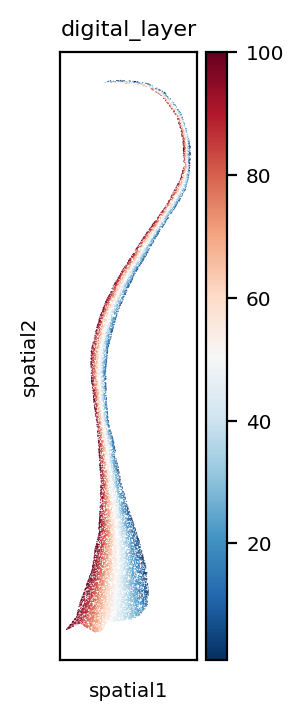

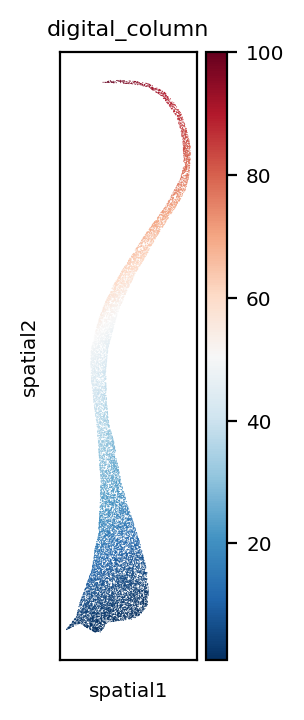

In [177]:
ptset = list()
for X in clicked:
    ptset.append(tuple([ X.get(key,0)[0] for key in ['_xs','_ys']]))

pnt_xY =  ptset[0] ## layer high column low, Dorsal-medial
pnt_xy =  ptset[1] ## layer low column low, Dorsal-lateral
pnt_Xy =  ptset[2]  ## layer low column high, ventral-lateral
pnt_XY =  ptset[3]  ## layer high column high, ventral-medial

st.dd.digitize(adata=adata,ctrs=contours,ctr_idx=0,pnt_xy=pnt_xy,pnt_xY=pnt_xY,pnt_Xy=pnt_Xy,pnt_XY=pnt_XY,spatial_key="spatial_cutbins")

### check

sc.pl.spatial(adata, color='digital_layer',spot_size=50)

sc.pl.spatial(adata, color='digital_column',spot_size=50)

In [178]:
adata.write_h5ad(ouput + adata.uns['chipid'] + "_digitalized.h5ad")